In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Melakukan load data
df = pd.read_csv(r'tempat_wisata_beserta_rating_wisatawan_untuk_kota_yogyakarta.csv')
# df = df.sort_values(by=['id_tempat'])
df.head()

,id_user,id_tempat,nama_tempat,kota,kategori,tarif,rating_tempat,latitude,longitude
0,1,179,Candi Ratu Boko,Yogyakarta,Budaya,75000,3,-7.770542,110.489416
1,1,101,Kampung Wisata Sosro Menduran,Yogyakarta,Budaya,0,4,-7.792190,110.362151
2,1,154,Pantai Ngrawe (Mesra),Yogyakarta,Bahari,10000,2,-8.133339,110.553741
3,1,103,Tugu Pal Putih Jogja,Yogyakarta,Taman Hiburan,0,3,-7.782944,110.367055
4,1,208,Taman Sungai Mudal,Yogyakarta,Cagar Alam,10000,5,-7.762814,110.116163


In [3]:
df.columns

Index(['id_user', 'id_tempat', 'nama_tempat', 'kota', 'kategori', 'tarif',
       'rating_tempat', 'latitude', 'longitude'],
      dtype='object')

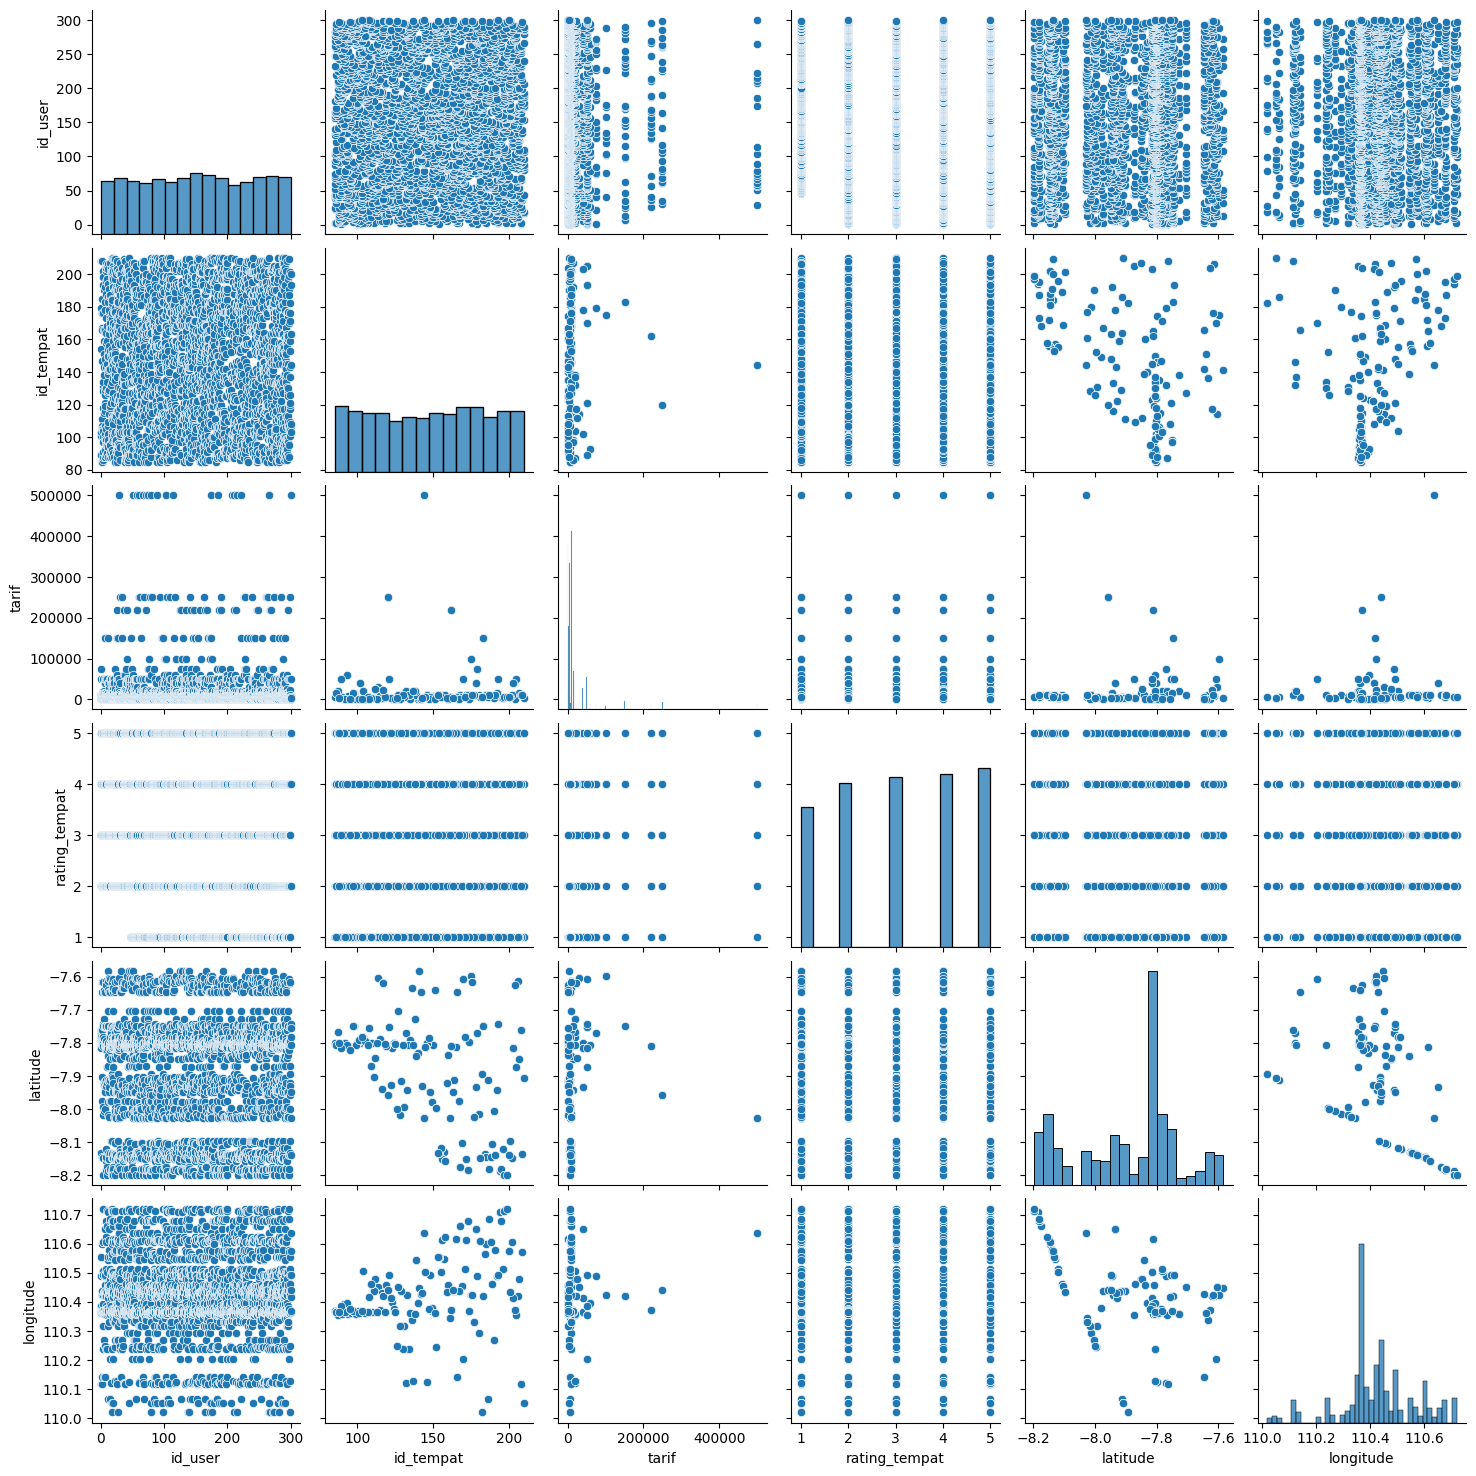

In [4]:
sns.pairplot(df)

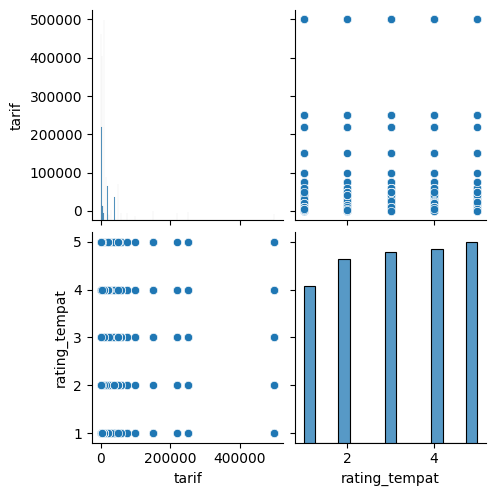

In [5]:
sns.pairplot(df[['tarif','rating_tempat', ]])

In [6]:
df.isnull().sum()

id_user          0
id_tempat        0
nama_tempat      0
kota             0
kategori         0
tarif            0
rating_tempat    0
latitude         0
longitude        0
dtype: int64

In [7]:
# data = df[['id_tempat', 'kategori', 'tarif', 'rating_tempat', 'latitude', 'longitude']]
data = df[['tarif', 'rating_tempat']]

In [8]:
data.head()

,tarif,rating_tempat
0,75000,3
1,0,4
2,10000,2
3,0,3
4,10000,5


In [9]:
# normalisasi min-max kolom tarif, rating_tempat
from sklearn.preprocessing import MinMaxScaler

# data_skaling = data[['tarif', 'rating_tempat', 'latitude', 'longitude']].copy()
data_skaling = data[['tarif', 'rating_tempat']].copy()

scaler = MinMaxScaler()
data_skaling = scaler.fit_transform(data_skaling.to_numpy())

data_training = data.copy()
# data_training[['tarif', 'rating_tempat', 'latitude', 'longitude']] = data_skaling
data_training[['tarif', 'rating_tempat']] = data_skaling
data_training


,tarif,rating_tempat
0,0.150,0.50
1,0.000,0.75
2,0.020,0.25
3,0.000,0.50
4,0.020,1.00
...,...,...
2866,0.010,0.25
2867,0.100,1.00
2868,0.000,1.00
2869,0.000,1.00


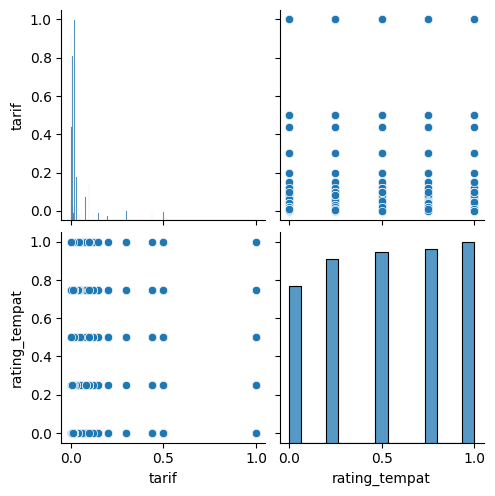

In [10]:
sns.pairplot(data_training)

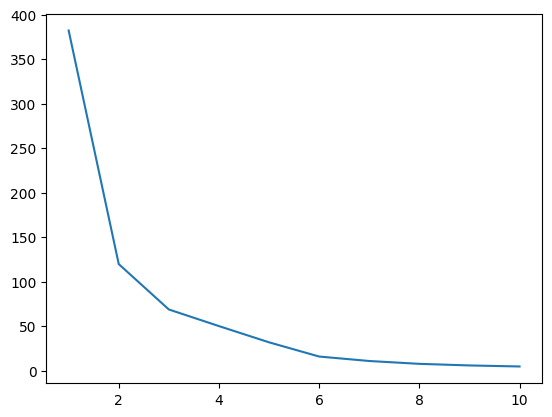

In [11]:
# metode elbow untuk menemukan jumlah cluster yang optimal untuk digunakan 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(data_training)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss);

In [12]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters = 6)
kmeans.fit(data_training)
df['kluster'] = kmeans.labels_
print(kmeans.labels_)
print(silhouette_score(data_training, kmeans.labels_))

[3 0 1 ... 2 2 1]
0.857745245710174


In [13]:
df

,id_user,id_tempat,nama_tempat,kota,kategori,tarif,rating_tempat,latitude,longitude,kluster
0,1,179,Candi Ratu Boko,Yogyakarta,Budaya,75000,3,-7.770542,110.489416,3
1,1,101,Kampung Wisata Sosro Menduran,Yogyakarta,Budaya,0,4,-7.792190,110.362151,0
2,1,154,Pantai Ngrawe (Mesra),Yogyakarta,Bahari,10000,2,-8.133339,110.553741,1
3,1,103,Tugu Pal Putih Jogja,Yogyakarta,Taman Hiburan,0,3,-7.782944,110.367055,3
4,1,208,Taman Sungai Mudal,Yogyakarta,Cagar Alam,10000,5,-7.762814,110.116163,2
...,...,...,...,...,...,...,...,...,...,...
2866,300,107,Bangsal Pagelaran,Yogyakarta,Budaya,5000,2,-7.805284,110.364214,1
2867,300,193,Candi Sewu,Yogyakarta,Budaya,50000,5,-7.743922,110.492909,2
2868,300,108,Embung Tambakboyo,Yogyakarta,Taman Hiburan,0,5,-7.756227,110.415013,2
2869,300,103,Tugu Pal Putih Jogja,Yogyakarta,Taman Hiburan,0,5,-7.782944,110.367055,2


In [14]:
# banyaknya data untuk setiap kluster
print("jumlah anggota untuk setiap kluster")
df['kluster'].value_counts()


# kluster 0 jumlahnya paling banyak (619 data) karena ratingnya yg tinggi (rating 5) dan jangkauan tarifnya
# relatif standar (antara Rp. 0 - Rp 25.000)
# kluster 5 jumlahnya paling sedikit (52 data) karena tarif wisata nya mahal dan ratingnya standar


jumlah anggota untuk setiap kluster


2    619
0    593
3    577
1    555
4    475
5     52
Name: kluster, dtype: int64

<AxesSubplot: xlabel='rating_tempat', ylabel='tarif'>

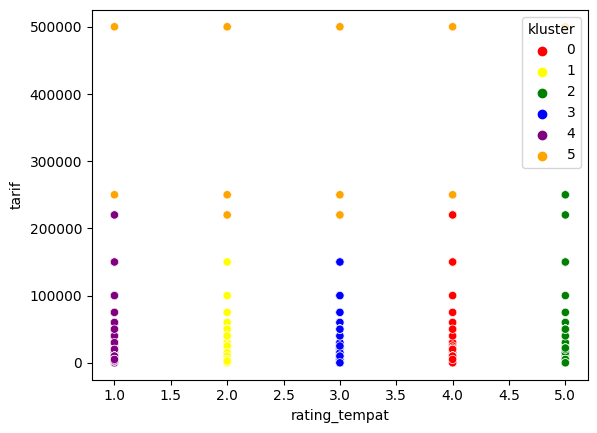

In [15]:
sns.scatterplot(x="rating_tempat", y="tarif",hue = 'kluster', 
palette=['red','yellow','green','blue','purple', 'orange'], data=df)

In [16]:
kluster0 = df.loc[(df['kluster'] == 0), ['tarif', 'rating_tempat']]
kluster1 = df.loc[(df['kluster'] == 1), ['tarif', 'rating_tempat']]
kluster2 = df.loc[(df['kluster'] == 2), ['tarif', 'rating_tempat']]
kluster3 = df.loc[(df['kluster'] == 3), ['tarif', 'rating_tempat']]
kluster4 = df.loc[(df['kluster'] == 4), ['tarif', 'rating_tempat']]
kluster5 = df.loc[(df['kluster'] == 5), ['tarif', 'rating_tempat']]

In [17]:
tarif_min = kluster0['tarif'].min()
tarif_max = kluster0['tarif'].max()
rating_min = kluster0['rating_tempat'].min()
rating_max = kluster0['rating_tempat'].max()
print('total kelompok kluster 0 pada dataset : ', len(kluster0))
print('rentang tarif  : ', 'Rp. ', tarif_min, ' - ', 'Rp. ', tarif_max)
print('rentang rating : ', rating_min, ' - ', rating_max)
print('_______________________________________________________________')
print('informasi rata - rata : ')
kluster0.mean()

total kelompok kluster 0 pada dataset :  593
rentang tarif  :  Rp.  0  -  Rp.  220000
rentang rating :  4  -  4
_______________________________________________________________
informasi rata - rata : 


tarif            16344.856661
rating_tempat        4.000000
dtype: float64

In [18]:
tarif_min = kluster3['tarif'].min()
tarif_max = kluster3['tarif'].max()
rating_min = kluster3['rating_tempat'].min()
rating_max = kluster3['rating_tempat'].max()
print('total kelompok kluster 3 pada dataset : ', len(kluster3))
print('rentang tarif  : ', 'Rp. ', tarif_min, ' - ', 'Rp. ', tarif_max)
print('rentang rating : ', rating_min, ' - ', rating_max)
print('_______________________________________________________________')
print('informasi rata - rata : ')
kluster3.mean()

total kelompok kluster 3 pada dataset :  577
rentang tarif  :  Rp.  0  -  Rp.  150000
rentang rating :  3  -  3
_______________________________________________________________
informasi rata - rata : 


tarif            13044.194107
rating_tempat        3.000000
dtype: float64

In [19]:
tarif_min = kluster2['tarif'].min()
tarif_max = kluster2['tarif'].max()
rating_min = kluster2['rating_tempat'].min()
rating_max = kluster2['rating_tempat'].max()
print('total kelompok kluster 2 pada dataset : ', len(kluster2))
print('rentang tarif  : ', 'Rp. ', tarif_min, ' - ', 'Rp. ', tarif_max)
print('rentang rating : ', rating_min, ' - ', rating_max)
print('_______________________________________________________________')
print('informasi rata - rata : ')
kluster2.mean()

total kelompok kluster 2 pada dataset :  619
rentang tarif  :  Rp.  0  -  Rp.  250000
rentang rating :  5  -  5
_______________________________________________________________
informasi rata - rata : 


tarif            13309.369952
rating_tempat        5.000000
dtype: float64

In [20]:
tarif_min = kluster1['tarif'].min()
tarif_max = kluster1['tarif'].max()
rating_min = kluster1['rating_tempat'].min()
rating_max = kluster1['rating_tempat'].max()
print('total kelompok kluster 1 pada dataset : ', len(kluster1))
print('rentang tarif  : ', 'Rp. ', tarif_min, ' - ', 'Rp. ', tarif_max)
print('rentang rating : ', rating_min, ' - ', rating_max)
print('_______________________________________________________________')
print('informasi rata - rata : ')
kluster1.mean()

total kelompok kluster 1 pada dataset :  555
rentang tarif  :  Rp.  0  -  Rp.  150000
rentang rating :  2  -  2
_______________________________________________________________
informasi rata - rata : 


tarif            10711.711712
rating_tempat        2.000000
dtype: float64

In [21]:
tarif_min = kluster4['tarif'].min()
tarif_max = kluster4['tarif'].max()
rating_min = kluster4['rating_tempat'].min()
rating_max = kluster4['rating_tempat'].max()
print('total kelompok kluster 4 pada dataset : ', len(kluster4))
print('rentang tarif  : ', 'Rp. ', tarif_min, ' - ', 'Rp. ', tarif_max)
print('rentang rating : ', rating_min, ' - ', rating_max)
print('_______________________________________________________________')
print('informasi rata - rata : ')
kluster4.mean()

total kelompok kluster 4 pada dataset :  475
rentang tarif  :  Rp.  0  -  Rp.  220000
rentang rating :  1  -  1
_______________________________________________________________
informasi rata - rata : 


tarif            13087.368421
rating_tempat        1.000000
dtype: float64

In [22]:
tarif_min = kluster5['tarif'].min()
tarif_max = kluster5['tarif'].max()
rating_min = kluster5['rating_tempat'].min()
rating_max = kluster5['rating_tempat'].max()
print('total kelompok kluster 5 pada dataset : ', len(kluster5))
print('rentang tarif  : ', 'Rp. ', tarif_min, ' - ', 'Rp. ', tarif_max)
print('rentang rating : ', rating_min, ' - ', rating_max)
print('_______________________________________________________________')
print('informasi rata - rata : ')
kluster5.mean()

total kelompok kluster 5 pada dataset :  52
rentang tarif  :  Rp.  220000  -  Rp.  500000
rentang rating :  1  -  5
_______________________________________________________________
informasi rata - rata : 


tarif            344038.461538
rating_tempat         2.500000
dtype: float64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5f8094c4-d71c-4207-80a7-c8a762375552' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>